In [1]:
#importer les package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 

In [2]:
#lire la base de donnees
df=pd.read_csv('train.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [3]:
df.columns#afficher les colonnes

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#voir les informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#afficher tt base de donnees 
pd.set_option('display.max_rows',df.shape[0]+1)

In [6]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [7]:
df.describe()#valeur statistique numerique

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [8]:
df.describe(include='O')#afficher les valeurs sumailure de type categorique 

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
#renseigner les valeur manquantes 
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
    if c==object:
        cat_data.append(df.iloc[:,i])
    else :
        num_data.append(df.iloc[:,i])

In [37]:
cat_data

[0            RL
 1            RL
 2            RL
 3            RL
 4            RL
 5            RL
 6            RL
 7            RL
 8            RM
 9            RL
 10           RL
 11           RL
 12           RL
 13           RL
 14           RL
 15           RM
 16           RL
 17           RL
 18           RL
 19           RL
 20           RL
 21           RM
 22           RL
 23           RM
 24           RL
 25           RL
 26           RL
 27           RL
 28           RL
 29           RM
 30      C (all)
 31           RL
 32           RL
 33           RL
 34           RL
 35           RL
 36           RL
 37           RL
 38           RL
 39           RL
 40           RL
 41           RL
 42           RL
 43           RL
 44           RL
 45           RL
 46           RL
 47           FV
 48           RM
 49           RL
 50           RL
 51           RM
 52           RM
 53           RL
 54           RL
 55           RL
 56           FV
 57           RL
 58           

In [38]:
cat_data=pd.DataFrame(cat_data).transpose()
cat_data

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave   NaN      IR2         Lvl    AllPub    Inside       Gtl   
13         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
14         RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
15         RM   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
16         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
17         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
18         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
19         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
20         RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
21         RM   Pave  Grvl      Reg         Bnk    AllPub    Inside       Gtl   
22         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
23         RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
24         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
25         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
26         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
27         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
28         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
29         RM   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
30    C (all)   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
31         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
32         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
33         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
34         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
35         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
36         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
37         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
38         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
39         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
40         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
41         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
42         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
43         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
44         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
45         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
46         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
47         FV   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
48         RM   Pave   NaN      Reg 

In [39]:
num_data=pd.DataFrame(num_data).transpose()
num_data

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0    8450.0          7.0          5.0   
1        2.0        20.0         80.0    9600.0          6.0          8.0   
2        3.0        60.0         68.0   11250.0          7.0          5.0   
3        4.0        70.0         60.0    9550.0          7.0          5.0   
4        5.0        60.0         84.0   14260.0          8.0          5.0   
5        6.0        50.0         85.0   14115.0          5.0          5.0   
6        7.0        20.0         75.0   10084.0          8.0          5.0   
7        8.0        60.0          NaN   10382.0          7.0          6.0   
8        9.0        50.0         51.0    6120.0          7.0          5.0   
9       10.0       190.0         50.0    7420.0          5.0          6.0   
10      11.0        20.0         70.0   11200.0          5.0          5.0   
11      12.0        60.0         85.0   11924.0          9.0          5.0   
12      13.0        20.0          NaN   12968.0          5.0          6.0   
13      14.0        20.0         91.0   10652.0          7.0          5.0   
14      15.0        20.0          NaN   10920.0          6.0          5.0   
15      16.0        45.0         51.0    6120.0          7.0          8.0   
16      17.0        20.0          NaN   11241.0          6.0          7.0   
17      18.0        90.0         72.0   10791.0          4.0          5.0   
18      19.0        20.0         66.0   13695.0          5.0          5.0   
19      20.0        20.0         70.0    7560.0          5.0          6.0   
20      21.0        60.0        101.0   14215.0          8.0          5.0   
21      22.0        45.0         57.0    7449.0          7.0          7.0   
22      23.0        20.0         75.0    9742.0          8.0          5.0   
23      24.0       120.0         44.0    4224.0          5.0          7.0   
24      25.0        20.0          NaN    8246.0          5.0          8.0   
25      26.0        20.0        110.0   14230.0          8.0          5.0   
26      27.0        20.0         60.0    7200.0          5.0          7.0   
27      28.0        20.0         98.0   11478.0          8.0          5.0   
28      29.0        20.0         47.0   16321.0          5.0          6.0   
29      30.0        30.0         60.0    6324.0          4.0          6.0   
30      31.0        70.0         50.0    8500.0          4.0          4.0   
31      32.0        20.0          NaN    8544.0          5.0          6.0   
32      33.0        20.0         85.0   11049.0          8.0          5.0   
33      34.0        20.0         70.0   10552.0          5.0          5.0   
34      35.0       120.0         60.0    7313.0          9.0          5.0   
35      36.0        60.0        108.0   13418.0          8.0          5.0   
36      37.0        20.0        112.0   10859.0          5.0          5.0   
37      38.0        20.0         74.0    8532.0          5.0          6.0   
38      39.0        20.0         68.0    7922.0          5.0          7.0   
39      40.0        90.0         65.0    6040.0          4.0          5.0   
40      41.0        20.0         84.0    8658.0          6.0          5.0   
41      42.0        20.0        115.0   16905.0          5.0          6.0   
42      43.0        85.0          NaN    9180.0          5.0          7.0   
43      44.0        20.0          NaN    9200.0          5.0          6.0   
44      45.0        20.0         70.0    7945.0          5.0          6.0   
45      46.0       120.0         61.0    7658.0          9.0          5.0   
46      47.0        50.0         48.0   12822.0          7.0          5.0   
47      48.0        20.0         84.0   11096.0          8.0          5.0   
48      49.0       190.0         33.0    4456.0          4.0          5.0   
49      50.0        20.0         66.0    7742.0          5.0          7.0   
50      51.0        60.0          NaN   13869.0          6.0          6.0   
51    

In [40]:
#pour les variable categorique on va remplacer les valeur manquante par les valeur qui se repeter le plus
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [41]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   object
 18  ExterQual      1460 non-null

In [42]:
cat_data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [43]:
cat_data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [44]:
cat_data['Alley'].value_counts()

Grvl    1419
Pave      41
Name: Alley, dtype: int64

In [46]:
cat_data['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [47]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

In [50]:
num_data.apply(lambda x: x.fillna(x.mean()),axis=0)


Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0        1.0        60.0    65.000000    8450.0          7.0          5.0   
1        2.0        20.0    80.000000    9600.0          6.0          8.0   
2        3.0        60.0    68.000000   11250.0          7.0          5.0   
3        4.0        70.0    60.000000    9550.0          7.0          5.0   
4        5.0        60.0    84.000000   14260.0          8.0          5.0   
5        6.0        50.0    85.000000   14115.0          5.0          5.0   
6        7.0        20.0    75.000000   10084.0          8.0          5.0   
7        8.0        60.0    70.049958   10382.0          7.0          6.0   
8        9.0        50.0    51.000000    6120.0          7.0          5.0   
9       10.0       190.0    50.000000    7420.0          5.0          6.0   
10      11.0        20.0    70.000000   11200.0          5.0          5.0   
11      12.0        60.0    85.000000   11924.0          9.0          5.0   
12      13.0        20.0    70.049958   12968.0          5.0          6.0   
13      14.0        20.0    91.000000   10652.0          7.0          5.0   
14      15.0        20.0    70.049958   10920.0          6.0          5.0   
15      16.0        45.0    51.000000    6120.0          7.0          8.0   
16      17.0        20.0    70.049958   11241.0          6.0          7.0   
17      18.0        90.0    72.000000   10791.0          4.0          5.0   
18      19.0        20.0    66.000000   13695.0          5.0          5.0   
19      20.0        20.0    70.000000    7560.0          5.0          6.0   
20      21.0        60.0   101.000000   14215.0          8.0          5.0   
21      22.0        45.0    57.000000    7449.0          7.0          7.0   
22      23.0        20.0    75.000000    9742.0          8.0          5.0   
23      24.0       120.0    44.000000    4224.0          5.0          7.0   
24      25.0        20.0    70.049958    8246.0          5.0          8.0   
25      26.0        20.0   110.000000   14230.0          8.0          5.0   
26      27.0        20.0    60.000000    7200.0          5.0          7.0   
27      28.0        20.0    98.000000   11478.0          8.0          5.0   
28      29.0        20.0    47.000000   16321.0          5.0          6.0   
29      30.0        30.0    60.000000    6324.0          4.0          6.0   
30      31.0        70.0    50.000000    8500.0          4.0          4.0   
31      32.0        20.0    70.049958    8544.0          5.0          6.0   
32      33.0        20.0    85.000000   11049.0          8.0          5.0   
33      34.0        20.0    70.000000   10552.0          5.0          5.0   
34      35.0       120.0    60.000000    7313.0          9.0          5.0   
35      36.0        60.0   108.000000   13418.0          8.0          5.0   
36      37.0        20.0   112.000000   10859.0          5.0          5.0   
37      38.0        20.0    74.000000    8532.0          5.0          6.0   
38      39.0        20.0    68.000000    7922.0          5.0          7.0   
39      40.0        90.0    65.000000    6040.0          4.0          5.0   
40      41.0        20.0    84.000000    8658.0          6.0          5.0   
41      42.0        20.0   115.000000   16905.0          5.0          6.0   
42      43.0        85.0    70.049958    9180.0          5.0          7.0   
43      44.0        20.0    70.049958    9200.0          5.0          6.0   
44      45.0        20.0    70.000000    7945.0          5.0          6.0   
45      46.0       120.0    61.000000    7658.0          9.0          5.0   
46      47.0        50.0    48.000000   12822.0          7.0          5.0   
47      48.0        20.0    84.000000   11096.0          8.0          5.0   
48      49.0       190.0    33.000000    4456.0          4.0          5.0   
49      50.0        20.0    66.000000    7742.0          5.0          7.0   
50      51.0        60.0    70.049958   13869.0          6.0          6.0   
51    

In [51]:
num_data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [52]:
num_data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [53]:
#pour les variables numeriques on va remplacer les valeur manquante par la valeur precedente de la meme colonne
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()

False

In [54]:
num_data.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
#Remplacer les valeurs categorique par des valeurs numerique 0,1,2...
le=LabelEncoder()
for i in cat_data :
    cat_data[i]=le.fit_transform(cat_data[i])
cat_data

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0            3       1      0         3            3          0          4   
1            3       1      0         3            3          0          2   
2            3       1      0         0            3          0          4   
3            3       1      0         0            3          0          0   
4            3       1      0         0            3          0          2   
5            3       1      0         0            3          0          4   
6            3       1      0         3            3          0          4   
7            3       1      0         0            3          0          0   
8            4       1      0         3            3          0          4   
9            3       1      0         3            3          0          0   
10           3       1      0         3            3          0          4   
11           3       1      0         0            3          0          4   
12           3       1      0         1            3          0          4   
13           3       1      0         0            3          0          4   
14           3       1      0         0            3          0          0   
15           4       1      0         3            3          0          0   
16           3       1      0         0            3          0          1   
17           3       1      0         3            3          0          4   
18           3       1      0         3            3          0          4   
19           3       1      0         3            3          0          4   
20           3       1      0         0            3          0          0   
21           4       1      0         3            0          0          4   
22           3       1      0         3            3          0          4   
23           4       1      0         3            3          0          4   
24           3       1      0         0            3          0          4   
25           3       1      0         3            3          0          0   
26           3       1      0         3            3          0          0   
27           3       1      0         3            3          0          4   
28           3       1      0         0            3          0          1   
29           4       1      0         0            3          0          4   
30           0       1      1         3            3          0          4   
31           3       1      0         0            3          0          1   
32           3       1      0         3            3          0          0   
33           3       1      0         0            3          0          4   
34           3       1      0         3            3          0          4   
35           3       1      0         3            3          0          4   
36           3       1      0         3            3          0          0   
37           3       1      0         3            3          0          4   
38           3       1      0         3            3          0          4   
39           3       1      0         3            3          0          4   
40           3       1      0         3            3          0          4   
41           3       1      0         3            3          0          4   
42           3       1      0         0            3          0          1   
43           3       1      0         0            3          0          1   
44           3       1      0         3            3          0          4   
45           3       1      0         3            3          0          4   
46           3       1      0         0            3          0          1   
47           1       1      0         3            3          0          4   
48           4       1      0         3            3          0          4   
49           3       1      0         3            3          0          4   
50           3       1      

In [57]:
#Concatener cat_data et num_data et specifier la colonne target
df1=pd.concat([cat_data,num_data],axis=1)

In [58]:
df1.head()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0         3       1      0         3            3          0          4   
1         3       1      0         3            3          0          2   
2         3       1      0         0            3          0          4   
3         3       1      0         0            3          0          0   
4         3       1      0         0            3          0          2   

   LandSlope  Neighborhood  Condition1  ...  WoodDeckSF  OpenPorchSF  \
0          0             5           2  ...         0.0         61.0   
1          0            24           1  ...       298.0          0.0   
2          0             5           2  ...         0.0         42.0   
3          0             6           2  ...         0.0         35.0   
4          0            15           2  ...       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0            0.0        0.0          0.0       0.0      0.0     2.0  2008.0   
1            0.0        0.0          0.0       0.0      0.0     5.0  2007.0   
2            0.0        0.0          0.0       0.0      0.0     9.0  2008.0   
3          272.0        0.0          0.0       0.0      0.0     2.0  2006.0   
4            0.0        0.0          0.0       0.0      0.0    12.0  2008.0   

   SalePrice  
0   208500.0  
1   181500.0  
2   223500.0  
3   140000.0  
4   250000.0  

[5 rows x 81 columns]

In [64]:
df1.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Id', 'MSSubClass', 'LotFrontage',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRms

C:\Users\sbaia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

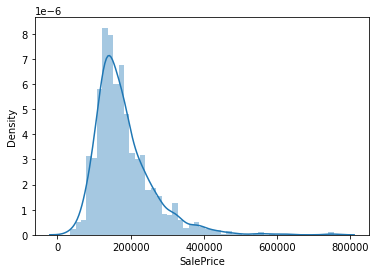

In [59]:
sns.distplot(df1['SalePrice']) #Affichage du Prix

In [60]:
corel=df.corr()
corel

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

<AxesSubplot:>

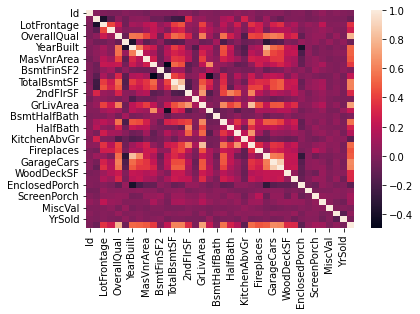

In [61]:
sns.heatmap(corel)

In [67]:
y= df1['SalePrice'] #Target qu'on va Prédire
x = df1.drop('SalePrice',axis=1)

In [68]:
#deviser la base de donnees en une base de donnees test et d entrainement
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3) 

In [69]:
print('X_train taille : ',x_train.shape)
print('X_test taille : ',x_test.shape)
print('Y_train taille : ',y_train.shape)
print('Y_test taille : ',y_test.shape)

X_train taille :  (1022, 80)
X_test taille :  (438, 80)
Y_train taille :  (1022,)
Y_test taille :  (438,)


In [70]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.8707097781252096

In [76]:
y_pred = rf.predict(x_test)
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17735.734429223743
Mean Squared Error: 766509645.2694658
Root Mean Squared Error: 27685.91059130015


In [71]:
from sklearn.linear_model import LinearRegression 
lm=LinearRegression() 
lm.fit(x_train, y_train)
lm.score(x_test, y_test)

0.26927725467407704

In [72]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.753082200961087

In [73]:
from sklearn import svm
svm= svm.SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.01598173515981735

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
gb= GradientBoostingRegressor().fit(x_train, y_train)
gb.score(x_test, y_test)

0.8874321008543162

In [75]:
y_pred = gb.predict(x_test)
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 16910.366575877684
Mean Squared Error: 667369729.8350072
Root Mean Squared Error: 25833.500146805643
